In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [3]:
NUM_CLASSES = 26

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),  # increased from 20 to 64 neurons
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),  # increased from 10 to 32 neurons
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,690 (22.23 KB)

 Trainable params: 5,690 (22.23 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
18/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0348 - loss: 3.3009
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0398 - loss: 3.2854 - val_accuracy: 0.0804 - val_loss: 3.1911
Epoch 2/1000
21/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0608 - loss: 3.1901 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0634 - loss: 3.1845 - val_accuracy: 0.0679 - val_loss: 3.1264
Epoch 3/1000
22/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0901 - loss: 3.1124 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0911 - loss: 3.1091 - val_accuracy: 0.1287 - val_loss: 3.0287
Epoch 4/1000
19/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1106 - loss: 3.0420 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 109/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7969
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8379 - val_loss: 0.1955 - val_accuracy: 0.9659
Epoch 110/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8281
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8505 - val_loss: 0.2020 - val_accuracy: 0.9614
Epoch 111/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8828
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8433 - val_loss: 0.1984 - val_accuracy: 0.9632
Epoch 112/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4205 

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7773 - loss: 0.6678 


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
[1.15044387e-02 1.13556304e-07 1.43121770e-06 3.53973126e-04
 6.08160254e-03 7.77948953e-05 1.83366623e-07 8.39502889e-07
 8.59979447e-03 6.34555981e-05 4.51028973e-06 2.52183119e-04
 2.36198664e-01 1.92726240e-01 3.00654734e-04 8.24276940e-04
 3.67165967e-07 7.69058708e-03 3.18721741e-01 2.11398095e-01
 2.53410462e-06 1.79644535e-10 1.11985435e-06 4.34617605e-03
 6.83019811e-04 1.66191123e-04]
18


# 混同行列

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


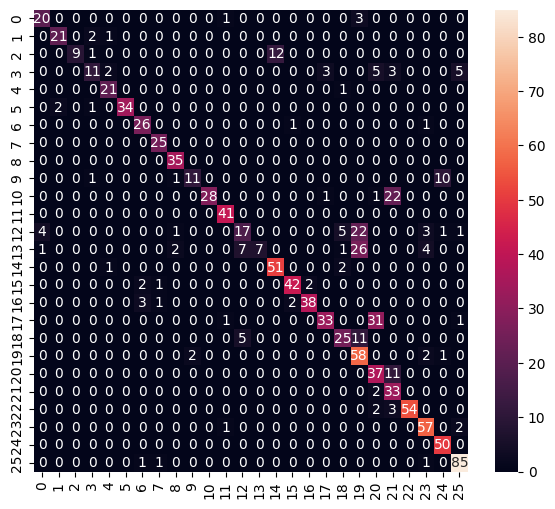

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.91      0.88      0.89        24
           2       1.00      0.41      0.58        22
           3       0.69      0.38      0.49        29
           4       0.84      0.95      0.89        22
           5       1.00      0.92      0.96        37
           6       0.81      0.93      0.87        28
           7       0.89      1.00      0.94        25
           8       0.90      1.00      0.95        35
           9       0.85      0.48      0.61        23
          10       1.00      0.54      0.70        52
          11       0.93      1.00      0.96        41
          12       0.59      0.31      0.41        54
          13       1.00      0.15      0.25        48
          14       0.81      0.94      0.87        54
          15       0.93      0.89      0.91        47
          16       0.95      0.86      0.90        44
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\kenjl\AppData\Local\Temp\tmppkc3fhh7\assets


INFO:tensorflow:Assets written to: C:\Users\kenjl\AppData\Local\Temp\tmppkc3fhh7\assets


Saved artifact at 'C:\Users\kenjl\AppData\Local\Temp\tmppkc3fhh7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  2284879828304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2283493728784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2283493730512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2283511497552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2283511500816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2283511498704: TensorSpec(shape=(), dtype=tf.resource, name=None)


11848

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.99 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.0553472e-02 1.2773947e-07 1.5453390e-06 3.8336433e-04 6.3970252e-03
 8.0975806e-05 1.7045245e-07 8.2925038e-07 7.8316582e-03 6.4159547e-05
 4.2326924e-06 2.3311561e-04 2.3619911e-01 1.8753953e-01 3.2314070e-04
 7.7995303e-04 3.6549295e-07 7.4931597e-03 3.3142808e-01 2.0530027e-01
 2.4748153e-06 1.9340902e-10 1.2642290e-06 4.5931037e-03 6.2676641e-04
 1.6202577e-04]
18
